1.) Set Up Environment

In [1]:
import pandas as pd #dataframe library
import numpy as np #numeric library
import datetime as dt

#plot library
import matplotlib.pyplot as plt 
import seaborn as sns 

#evaluation library
from sklearn.metrics import confusion_matrix, accuracy_score, classification_report,recall_score,precision_score

#label encoder library
from sklearn.preprocessing import LabelEncoder

# for min_max scaling (Kaggle)
from mlxtend.preprocessing import minmax_scaling

from sklearn.preprocessing import MinMaxScaler, StandardScaler

# ganti datatime
from sklearn.preprocessing import StandardScaler

# for Box-Cox Transformation
from scipy import stats

# set seed for reproducibility
np.random.seed(0)

2.) Dataset Preparation

In [2]:
# for SMP Team
smp_url = 'https://docs.google.com/spreadsheets/d/1fQjK_yvaj5yh006nRTcMXaoU0RAx8OUy2IhpZG4tNMw/edit#gid=0'
smp_data = smp_url.replace('/edit#gid=', '/export?format=csv&gid=')
smp = pd.read_csv(smp_data)

# for NS Team
ns_url = 'https://docs.google.com/spreadsheets/d/16Vrap9JRBTrq9vA-Xz-1ZkLv0GiaWZ6oETrhL4ry-Ok/edit#gid=0'
ns_data = ns_url.replace('/edit#gid=', '/export?format=csv&gid=')
ns = pd.read_csv(ns_data)

# for ITInfra Team
infra_url = 'https://docs.google.com/spreadsheets/d/1RxhtYZPFhB5F2a3434SAC6K11j_sRMhRDu5avKHMAQg/edit#gid=0'
infra_data = infra_url.replace('/edit#gid=', '/export?format=csv&gid=')
infra = pd.read_csv(infra_data)

# for Finance Team
fin_url = 'https://docs.google.com/spreadsheets/d/1F0KiwUmqIiknViTQ4Os_SdHdBVA2ErOOrSgH2Hqeumc/edit#gid=0'
fin_data = fin_url.replace('/edit#gid=', '/export?format=csv&gid=')
fin = pd.read_csv(fin_data)

3.) Merge Columns

In [3]:
# buat kolom baru di table infra
infra['payment_cat'] = ''

# looping untuk kondisi
for index, row in infra.iterrows():
    subsno_infra = row['subs_no']
    
    # cari kecocokan
    match = fin[
        (fin['subs_no'] == subsno_infra) 
    ]
    
    # copy data yang sesuai
    if not match.empty:
        infra.at[index, 'payment_cat'] = match.iloc[0]['payment_cat']

total_infra= len(infra)
print(total_infra)

43947


In [4]:
# buat kolom baru di table infra
infra['subs_key'] = ''
infra['rem_bal'] = ''
infra['rtd_amt'] = ''
infra['free_unit'] = ''
infra['usg_unit'] = ''
infra['sid'] = ''

# looping untuk kondisi
for index, row in infra.iterrows():
    servicefilter_infra = row['service_filter']
    subsno_infra = row['subs_no']
    timeno_infra = row['time_no']
    
    # cari kecocokan
    match = ns[
        (ns['service_filter'] == servicefilter_infra) &
        (ns['subs_no'] == subsno_infra) &
        (ns['time_no'] == timeno_infra)
    ]
    
    # copy data yang sesuai
    if not match.empty:
        infra.at[index, 'subs_key'] = match.iloc[0]['subs_key']
        infra.at[index, 'rem_bal'] = match.iloc[0]['rem_bal']
        infra.at[index, 'rtd_amt'] = match.iloc[0]['rtd_amt']
        infra.at[index, 'free_unit'] = match.iloc[0]['free_unit']
        infra.at[index, 'usg_unit'] = match.iloc[0]['usg_unit']
        infra.at[index, 'sid'] = match.iloc[0]['sid']

total_infra= len(infra)
print(total_infra)

43947


4.) Make a Copy 

In [5]:
data = infra.copy()

5.) Change Name and Order of Columns)

In [6]:
print(data.columns)

Index(['day_no', 'time_no', 'service_filter', 'subs_no', 'b_no',
       'event_action_code', 'prefix_dom_sk_id', 'originating_cell_id',
       'home_poc', 'city_name', 'physical_poc', 'roam_zone', 'destination_poc',
       'payment_cat', 'subs_key', 'rem_bal', 'rtd_amt', 'free_unit',
       'usg_unit', 'sid'],
      dtype='object')


In [7]:
col_name = [
    'date', #date
    'date_time' , #date and time
    'service_type', #service_type
    'subs_no', #subs_no
    'destination_no', #b_no
    'event_action_code', #event_action_code
    'prefix_domain', #prefix_dom_sk_id
    'cell_id', #originating_cell_id
    'home_poc', #home_poc
    'city_name', #city_name
    'physical_poc', #physical_poc
    'roam_zone', #roam_zone
    'destination_poc', #destination_poc
    'payment_type', #payment_cat
    'subs_id', #subs_key
    'remaining_balance', #rem_bal
    'amount_of_trx', #rtd_amt
    'free_unit', #free_unit
    'usage_unit', #usg_unit
    'sid' #sid
]

col_name = [
    'date', #date
    'date_time' , #date and time
    'service_type', #service_type
    'subs_no', #subs_no
    'destination_no', #b_no
    'event_action_code', #event_action_code
    'prefix_domain', #prefix_dom_sk_id
    'cell_id', #originating_cell_id
    'home_poc', #home_poc
    'city_name', #city_name
    'physical_poc', #physical_poc
    'roam_zone', #roam_zone
    'destination_poc', #destination_poc
    'payment_type', #payment_cat
    'subs_id', #subs_key
    'remaining_balance', #rem_bal
    'amount_of_trx', #rtd_amt
    'free_unit', #free_unit
    'usage_unit', #usg_unit
    'sid' #sid
]

data.columns = col_name


order = [
    'date', #date
    'date_time' , #date and time
    'subs_no', #subs_no
    'subs_id', #subs_key
    'payment_type', #payment_cat
    'service_type', #service_type
    'destination_no', #b_no
    'event_action_code', #event_action_code
    'prefix_domain', #prefix_dom_sk_id
    'cell_id', #originating_cell_id
    'home_poc', #home_poc
    'city_name', #city_name
    'physical_poc', #physical_poc
    'roam_zone', #roam_zone
    'destination_poc', #destination_poc
    'remaining_balance', #rem_bal
    'amount_of_trx', #rtd_amt
    'free_unit', #free_unit
    'usage_unit', #usg_unit
    'sid' #sid
]

data = data[order]



6.) Dropping Un-Needed Columns

In [8]:
data = data.drop(['subs_id','destination_no','cell_id','prefix_domain','event_action_code', 'roam_zone', 'sid'], axis = 1)
data.head()

date          date_time     subs_no payment_type service_type home_poc  \
0  9/1/2021  9/1/2021 21:24:31  2106705274          PRE       SMSBAS      JK0   
1  9/1/2021  9/1/2021 21:29:28  2106705274          PRE       SMSBAS      JK0   
2  9/1/2021  9/1/2021 21:36:35  2106705274          PRE       SMSBAS      JK0   
3  9/1/2021   9/1/2021 7:43:24  1075588229          PRE       VASOCC    NOPOC   
4  9/1/2021   9/1/2021 4:24:54  1075588229          PRE       CONTEN      JK0   

  city_name physical_poc destination_poc remaining_balance amount_of_trx  \
0   JAKARTA          KA0             JKT               673            50   
1   JAKARTA          KA0             JKT               623            50   
2   JAKARTA          KA0             JKT               573            50   
3   JAKARTA            B               0              7220          5500   
4   JAKARTA          JK0               0            101720            55   

  free_unit usage_unit  
0       0.0          1  
1       0.0          1  
2       0.0          1  
3       0.0          1  
4       NaN    1048576

7.) Missing Values

In [9]:
missing_values_count = data.isnull().sum() + data.isin(['', ' ','00000000', None, np.nan]).sum()
missing_values_count

date                     0
date_time                0
subs_no                  0
payment_type             0
service_type             0
home_poc                 0
city_name                0
physical_poc             0
destination_poc      20229
remaining_balance        0
amount_of_trx            0
free_unit            14646
usage_unit               0
dtype: int64

In [10]:
#for free_unit
#jika free_unit memiliki nilai NULL, maka service_filter pada baris dengan nilai free_unit == NULL tersebut tidak memiliki fitur free_unit, sehingga nilai NULL harus diganti dengan nilai 0.
data['free_unit'] = data['free_unit'].fillna(0)
data['free_unit'] = data['free_unit'].replace(['', ' ', None], 0)


# for destination_poc
#00000000 --> service filter: CONTEN/VASOCC
#0 --> service filter:CONTEN/VASOCC
#(Blank) --> service filter: INTNAL/NATNAL
# so, we will fill the missing values of destination_poc with NOPOC
data['destination_poc'] = data['destination_poc'].fillna('NOPOC')
data['destination_poc'] = data['destination_poc'].replace(['', ' ','0', None, '00000000'], 'NOPOC')

missing_values_count = data.isnull().sum() + data.isin(['', ' ','00000000', None, np.nan]).sum()
missing_values_count

date                 0
date_time            0
subs_no              0
payment_type         0
service_type         0
home_poc             0
city_name            0
physical_poc         0
destination_poc      0
remaining_balance    0
amount_of_trx        0
free_unit            0
usage_unit           0
dtype: int64

8.) Data Type Check for Numerical Data 

In [11]:
data[['remaining_balance', 'amount_of_trx', 'free_unit', 'usage_unit']].dtypes

remaining_balance     object
amount_of_trx         object
free_unit            float64
usage_unit            object
dtype: object

In [12]:
def non_numeric(x):
    non_numeric_data = pd.DataFrame(data[data[x].astype(str).str.contains('[^0-9.-]')])
    return non_numeric_data

In [13]:
non_numeric('remaining_balance')

date          date_time    subs_no payment_type service_type  \
1108  9/8/2021  9/8/2021 14:36:18  545592898          PRE       CONTEN   
1109  9/8/2021  9/8/2021 14:36:08  545592898          PRE       CONTEN   
1110  9/8/2021  9/8/2021 14:36:12  545592898          PRE       CONTEN   
1111  9/8/2021  9/8/2021 14:36:15  545592898          PRE       CONTEN   
1112  9/8/2021  9/8/2021 14:36:15  545592898          PRE       CONTEN   
1113  9/8/2021  9/8/2021 14:36:15  545592898          PRE       CONTEN   
1114  9/8/2021  9/8/2021 14:36:15  545592898          PRE       CONTEN   

     home_poc city_name physical_poc destination_poc remaining_balance  \
1108      BD0   BANDUNG          MD0           NOPOC        2425:06:00   
1109      BD0   BANDUNG          MD0           NOPOC        2423:06:00   
1110      BD0   BANDUNG          MD0           NOPOC        2421:06:00   
1111      BD0   BANDUNG          MD0           NOPOC        2419:06:00   
1112      BD0   BANDUNG          MD0           NOPOC        2419:06:00   
1113      BD0   BANDUNG          MD0           NOPOC        2419:06:00   
1114      BD0   BANDUNG          MD0           NOPOC        2419:06:00   

     amount_of_trx  free_unit usage_unit  
1108            35        0.0    3993600  
1109             2        0.0     102400  
1110             2        0.0     102400  
1111             2        0.0     102400  
1112             2        0.0     102400  
1113             2        0.0     102400  
1114             2        0.0     102400

In [14]:
# delete
def non_numeric(x):
    non_numeric_mask = data[x].astype(str).str.contains('[^0-9.-]')
    data.drop(data[non_numeric_mask].index, inplace=True)
    return data

non_numeric('remaining_balance')

date           date_time     subs_no payment_type service_type  \
0       9/1/2021   9/1/2021 21:24:31  2106705274          PRE       SMSBAS   
1       9/1/2021   9/1/2021 21:29:28  2106705274          PRE       SMSBAS   
2       9/1/2021   9/1/2021 21:36:35  2106705274          PRE       SMSBAS   
3       9/1/2021    9/1/2021 7:43:24  1075588229          PRE       VASOCC   
4       9/1/2021    9/1/2021 4:24:54  1075588229          PRE       CONTEN   
...          ...                 ...         ...          ...          ...   
43942  4/30/2022  4/30/2022 18:22:21   712325998          PRE       NATNAL   
43943  4/30/2022   4/30/2022 7:49:52   712325998          PRE       NATNAL   
43944  4/30/2022  4/30/2022 20:39:32  1182349800          PRE       CONTEN   
43945  4/30/2022  4/30/2022 11:27:42  1182349800          PRE       CONTEN   
43946  4/30/2022  4/30/2022 22:27:26   767791937          PRE       NATNAL   

      home_poc           city_name physical_poc destination_poc  \
0          JK0             JAKARTA          KA0             JKT   
1          JK0             JAKARTA          KA0             JKT   
2          JK0             JAKARTA          KA0             JKT   
3        NOPOC             JAKARTA            B           NOPOC   
4          JK0             JAKARTA          JK0           NOPOC   
...        ...                 ...          ...             ...   
43942      JK0             JAKARTA          BD6             BDG   
43943      JK0             JAKARTA          BD6             BDG   
43944      JK0             JAKARTA          SB0           NOPOC   
43945      JK0             JAKARTA          SB0           NOPOC   
43946      MD2  TEBING TINGGI DELI          BD6             BDG   

      remaining_balance amount_of_trx  free_unit usage_unit  
0                   673            50        0.0          1  
1                   623            50        0.0          1  
2                   573            50        0.0          1  
3                  7220          5500        0.0          1  
4                101720            55        0.0    1048576  
...                 ...           ...        ...        ...  
43942              2206          3950        0.0       2460  
43943              6788           346        0.0        470  
43944              1567           668        0.0   34201600  
43945              5415             6        0.0     307200  
43946             23153           800        0.0        800  

[43940 rows x 13 columns]

In [15]:
# recheck
def non_numeric(x):
    non_numeric_data = pd.DataFrame(data[data[x].astype(str).str.contains('[^0-9.-]')])
    return non_numeric_data

non_numeric('remaining_balance')

Empty DataFrame
Columns: [date, date_time, subs_no, payment_type, service_type, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit]
Index: []

In [16]:
non_numeric('amount_of_trx')

Empty DataFrame
Columns: [date, date_time, subs_no, payment_type, service_type, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit]
Index: []

In [17]:
non_numeric('free_unit')

Empty DataFrame
Columns: [date, date_time, subs_no, payment_type, service_type, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit]
Index: []

In [18]:
non_numeric('usage_unit')

Empty DataFrame
Columns: [date, date_time, subs_no, payment_type, service_type, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit]
Index: []

In [19]:
data['amount_of_trx'] = data['amount_of_trx'].astype(float)
data['remaining_balance'] = data['remaining_balance'].astype(float)
data['usage_unit'] = data['usage_unit'].astype(float)

9.) Split Time from 'date_time' Column

In [20]:
date_time_dt = []
date_dt = []

data['date_time_dt'] = data['date_time']
data['date_dt'] = data['date']

In [21]:
data['date_time'] = pd.to_datetime(data['date_time'])
data['date'] = pd.to_datetime(data['date'])

In [22]:
#create separate column 
data['year'] = data['date_time'].dt.year
data['month'] = data['date_time'].dt.month
data['day'] = data['date_time'].dt.day
data['day_name'] = data['date_time'].dt.day_name()
data['month_name'] = data ['date_time'].dt.month_name()
data['hour'] = data['date_time'].dt.hour
#data['minute'] = data['date_time'].dt.minute

In [23]:
order = [
    'date_time',
    'date_time_dt',
    'date',
    'date_dt',
    'year',
    'month',
    'month_name',
    'day',
    'day_name',
    'hour',
    'service_type',
    'payment_type',
    'subs_no',
    'home_poc',
    'city_name',
    'physical_poc',
    'destination_poc',
    'remaining_balance',
    'amount_of_trx',
    'free_unit',
    'usage_unit'
]

data = data[order]

In [24]:
data.head()

date_time       date_time_dt       date   date_dt  year  month  \
0 2021-09-01 21:24:31  9/1/2021 21:24:31 2021-09-01  9/1/2021  2021      9   
1 2021-09-01 21:29:28  9/1/2021 21:29:28 2021-09-01  9/1/2021  2021      9   
2 2021-09-01 21:36:35  9/1/2021 21:36:35 2021-09-01  9/1/2021  2021      9   
3 2021-09-01 07:43:24   9/1/2021 7:43:24 2021-09-01  9/1/2021  2021      9   
4 2021-09-01 04:24:54   9/1/2021 4:24:54 2021-09-01  9/1/2021  2021      9   

  month_name  day   day_name  hour  ... payment_type     subs_no  home_poc  \
0  September    1  Wednesday    21  ...          PRE  2106705274       JK0   
1  September    1  Wednesday    21  ...          PRE  2106705274       JK0   
2  September    1  Wednesday    21  ...          PRE  2106705274       JK0   
3  September    1  Wednesday     7  ...          PRE  1075588229     NOPOC   
4  September    1  Wednesday     4  ...          PRE  1075588229       JK0   

  city_name physical_poc destination_poc remaining_balance  amount_of_trx  \
0   JAKARTA          KA0             JKT             673.0           50.0   
1   JAKARTA          KA0             JKT             623.0           50.0   
2   JAKARTA          KA0             JKT             573.0           50.0   
3   JAKARTA            B           NOPOC            7220.0         5500.0   
4   JAKARTA          JK0           NOPOC          101720.0           55.0   

   free_unit  usage_unit  
0        0.0         1.0  
1        0.0         1.0  
2        0.0         1.0  
3        0.0         1.0  
4        0.0   1048576.0  

[5 rows x 21 columns]

In [25]:
counts_service_type = data['service_type'].value_counts()
print(counts_service_type)

service_type
CONTEN    14639
SMSBAS    10382
NATNAL    10292
VASOCC     4257
INTNAL     3627
SPVOIC      550
SPCSMS      193
Name: count, dtype: int64


In [26]:
mapping = {
    'CONTEN': '0',
    'SMSBAS': '1',
    'NATNAL': '2',
    'VASOCC': '3',
    'INTNAL': '4',
    'SPVOIC': '5',
    'SPCSMS': '6'
}

data['servicetype_code'] = data['service_type'].map(mapping)


C:\Users\asus1\AppData\Local\Temp\ipykernel_25864\192938363.py:11: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  data['servicetype_code'] = data['service_type'].map(mapping)


10.) Import to Database

In [27]:
%pip install mysql-connector-python
import mysql.connector

db_config = {
    'host': '34.101.46.136',
    'user': 'root',
    'password': 'Ay0cepatlulu$',
    'database': 'datafabric'
}

connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

table_name = 'dummy'

Note: you may need to restart the kernel to use updated packages.


In [28]:
insert_query = '''
INSERT INTO {} (date_time, date_time_dt, date, date_dt, year, month, month_name, day, day_name, hour, service_type, payment_type, subs_no, home_poc, city_name, physical_poc, destination_poc, remaining_balance, amount_of_trx, free_unit, usage_unit, servicetype_code)
VALUES (%s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s, %s)
'''.format(table_name)

In [29]:
connection = mysql.connector.connect(**db_config)
cursor = connection.cursor()

value = data.to_records(index=False).tolist()
cursor.executemany(insert_query, value)
connection.commit()

DATA PREPARATION FOR MACHINE LEARNING -------------------------------------------------------------------------------

1.) Dropping un-needed column (similar purposes)

In [27]:
data = data.drop(['date', 'date_time', 'month_name','service_type', 'date_dt', 'date_time_dt'], axis = 1)

In [28]:
data.head()

year  month  day   day_name  hour payment_type     subs_no home_poc  \
0  2021      9    1  Wednesday    21          PRE  2106705274      JK0   
1  2021      9    1  Wednesday    21          PRE  2106705274      JK0   
2  2021      9    1  Wednesday    21          PRE  2106705274      JK0   
3  2021      9    1  Wednesday     7          PRE  1075588229    NOPOC   
4  2021      9    1  Wednesday     4          PRE  1075588229      JK0   

  city_name physical_poc destination_poc  remaining_balance  amount_of_trx  \
0   JAKARTA          KA0             JKT              673.0           50.0   
1   JAKARTA          KA0             JKT              623.0           50.0   
2   JAKARTA          KA0             JKT              573.0           50.0   
3   JAKARTA            B           NOPOC             7220.0         5500.0   
4   JAKARTA          JK0           NOPOC           101720.0           55.0   

   free_unit  usage_unit servicetype_code  
0        0.0         1.0                1  
1        0.0         1.0                1  
2        0.0         1.0                1  
3        0.0         1.0                3  
4        0.0   1048576.0                0

2.) Data Correlation

In [29]:
LE = LabelEncoder()
data['day_name'] = LE.fit_transform(data['day_name'])
data['payment_type'] = LE.fit_transform(data['payment_type'])
data['home_poc'] = LE.fit_transform(data['home_poc'])
data['city_name'] = LE.fit_transform(data['city_name'])
data['physical_poc'] = LE.fit_transform(data['physical_poc'])
data['destination_poc'] = LE.fit_transform(data['destination_poc'])


In [30]:
data.head()

year  month  day  day_name  hour  payment_type     subs_no  home_poc  \
0  2021      9    1         6    21             1  2106705274        34   
1  2021      9    1         6    21             1  2106705274        34   
2  2021      9    1         6    21             1  2106705274        34   
3  2021      9    1         6     7             1  1075588229        77   
4  2021      9    1         6     4             1  1075588229        34   

   city_name  physical_poc  destination_poc  remaining_balance  amount_of_trx  \
0         24            39               43              673.0           50.0   
1         24            39               43              623.0           50.0   
2         24            39               43              573.0           50.0   
3         24             2               90             7220.0         5500.0   
4         24            33               90           101720.0           55.0   

   free_unit  usage_unit servicetype_code  
0        0.0         1.0                1  
1        0.0         1.0                1  
2        0.0         1.0                1  
3        0.0         1.0                3  
4        0.0   1048576.0                0

In [31]:
total_data= len(data)
print(total_data)

43940


In [32]:
counts_service_type = data['servicetype_code'].value_counts()
print(counts_service_type)

servicetype_code
0    14639
1    10382
2    10292
3     4257
4     3627
5      550
6      193
Name: count, dtype: int64


In [33]:
data_corr = data.corr()
print(data_corr)

                       year     month       day  day_name      hour  \
year               1.000000 -0.638232 -0.079009 -0.054554 -0.023898   
month             -0.638232  1.000000  0.044509  0.063961  0.065437   
day               -0.079009  0.044509  1.000000 -0.016947 -0.020226   
day_name          -0.054554  0.063961 -0.016947  1.000000 -0.020521   
hour              -0.023898  0.065437 -0.020226 -0.020521  1.000000   
payment_type       0.097204 -0.193404 -0.018751 -0.010124 -0.046073   
subs_no           -0.015899 -0.063830  0.022977 -0.040320 -0.023088   
home_poc           0.038410 -0.082147  0.002441 -0.000081 -0.047053   
city_name          0.105409 -0.056548 -0.062353 -0.008929 -0.001125   
physical_poc       0.118212 -0.057199 -0.005018 -0.036950  0.044030   
destination_poc   -0.060652 -0.044653  0.023178  0.016130 -0.084947   
remaining_balance -0.108034  0.230789  0.021954  0.009480  0.077650   
amount_of_trx     -0.008882  0.024470  0.002080  0.005493 -0.053084   
free_u

Axes(0.125,0.11;0.62x0.77)


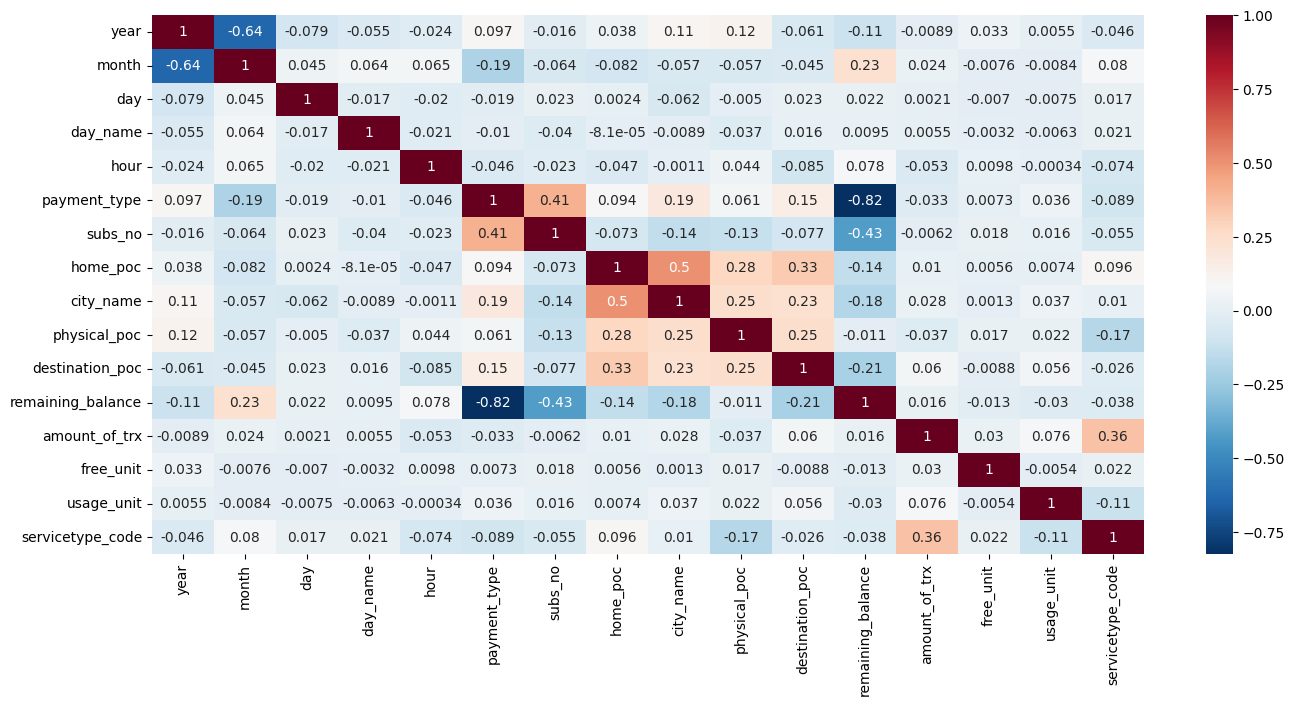

In [34]:
plt.figure(figsize = (16,7))
corr_plot = sns.heatmap(data.corr(),cmap="RdBu_r", annot=True)
print(corr_plot)

In [ ]:
threshold = 0.2

choosen_columns = []
for column in data_corr:
    if any((data_corr[column] > threshold) | (data_corr[column] < -threshold)):
        choosen_columns.append(column)

print("Choosen columns:", choosen_columns)

Choosen columns: ['year', 'month', 'day', 'day_name', 'hour', 'payment_type', 'subs_no', 'home_poc', 'city_name', 'physical_poc', 'destination_poc', 'remaining_balance', 'amount_of_trx', 'free_unit', 'usage_unit', 'servicetype_code']


In [35]:
data = data.drop(['amount_of_trx', 'free_unit'], axis = 1)

3.) Scaling

In [36]:
data.head()

year  month  day  day_name  hour  payment_type     subs_no  home_poc  \
0  2021      9    1         6    21             1  2106705274        34   
1  2021      9    1         6    21             1  2106705274        34   
2  2021      9    1         6    21             1  2106705274        34   
3  2021      9    1         6     7             1  1075588229        77   
4  2021      9    1         6     4             1  1075588229        34   

   city_name  physical_poc  destination_poc  remaining_balance  usage_unit  \
0         24            39               43              673.0         1.0   
1         24            39               43              623.0         1.0   
2         24            39               43              573.0         1.0   
3         24             2               90             7220.0         1.0   
4         24            33               90           101720.0   1048576.0   

  servicetype_code  
0                1  
1                1  
2                1  
3                3  
4                0

In [37]:
scaler = MinMaxScaler()
scale_column = ['usage_unit']
scaler.fit(data[scale_column])
data[scale_column] = scaler.transform(data[scale_column])
print(data)

       year  month  day  day_name  hour  payment_type     subs_no  home_poc  \
0      2021      9    1         6    21             1  2106705274        34   
1      2021      9    1         6    21             1  2106705274        34   
2      2021      9    1         6    21             1  2106705274        34   
3      2021      9    1         6     7             1  1075588229        77   
4      2021      9    1         6     4             1  1075588229        34   
...     ...    ...  ...       ...   ...           ...         ...       ...   
43942  2022      4   30         2    18             1   712325998        34   
43943  2022      4   30         2     7             1   712325998        34   
43944  2022      4   30         2    20             1  1182349800        34   
43945  2022      4   30         2    11             1  1182349800        34   
43946  2022      4   30         2    22             1   767791937        57   

       city_name  physical_poc  destination_poc  re

In [107]:
data.head()

year  month  day  day_name  hour  payment_type     subs_no  home_poc  \
0  2021      9    1         6    21             1  2106705274        34   
1  2021      9    1         6    21             1  2106705274        34   
2  2021      9    1         6    21             1  2106705274        34   
3  2021      9    1         6     7             1  1075588229        77   
4  2021      9    1         6     4             1  1075588229        34   

   city_name  physical_poc  destination_poc  remaining_balance  \
0         24            39               43              673.0   
1         24            39               43              623.0   
2         24            39               43              573.0   
3         24             2               90             7220.0   
4         24            33               90           101720.0   

  servicetype_code  
0                1  
1                1  
2                1  
3                3  
4                0

----------------------------------------

Decision Tree

In [108]:
import pandas as pd #library untuk dataframe
import numpy as np #library untuk komputasi
from sklearn.tree import DecisionTreeClassifier
from sklearn.datasets import load_iris
from sklearn.model_selection import train_test_split
from sklearn.metrics import accuracy_score,classification_report,confusion_matrix
from sklearn import tree
from sklearn.preprocessing import LabelEncoder 
import matplotlib.pyplot as plt

In [109]:
data.head()

year  month  day  day_name  hour  payment_type     subs_no  home_poc  \
0  2021      9    1         6    21             1  2106705274        34   
1  2021      9    1         6    21             1  2106705274        34   
2  2021      9    1         6    21             1  2106705274        34   
3  2021      9    1         6     7             1  1075588229        77   
4  2021      9    1         6     4             1  1075588229        34   

   city_name  physical_poc  destination_poc  remaining_balance  \
0         24            39               43              673.0   
1         24            39               43              623.0   
2         24            39               43              573.0   
3         24             2               90             7220.0   
4         24            33               90           101720.0   

  servicetype_code  
0                1  
1                1  
2                1  
3                3  
4                0

In [110]:
X = data.drop('servicetype_code', axis=1)
print(X)

       year  month  day  day_name  hour  payment_type     subs_no  home_poc  \
0      2021      9    1         6    21             1  2106705274        34   
1      2021      9    1         6    21             1  2106705274        34   
2      2021      9    1         6    21             1  2106705274        34   
3      2021      9    1         6     7             1  1075588229        77   
4      2021      9    1         6     4             1  1075588229        34   
...     ...    ...  ...       ...   ...           ...         ...       ...   
43942  2022      4   30         2    18             1   712325998        34   
43943  2022      4   30         2     7             1   712325998        34   
43944  2022      4   30         2    20             1  1182349800        34   
43945  2022      4   30         2    11             1  1182349800        34   
43946  2022      4   30         2    22             1   767791937        57   

       city_name  physical_poc  destination_poc  re

In [111]:
Y=data.servicetype_code # menampilkan kolom label (output/kelas)
print(Y)

0        1
1        1
2        1
3        3
4        0
        ..
43942    2
43943    2
43944    0
43945    0
43946    2
Name: servicetype_code, Length: 43940, dtype: object


In [112]:
print(train_test_split)

<function train_test_split at 0x00000250538A8AE0>


In [113]:
# split dataset into training and testing sets
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, test_size=0.2, random_state=42)


In [114]:
# ApplY SMOTE oversampling to the training data
from imblearn.over_sampling import SMOTE
smote = SMOTE(random_state=42)
X_sampling, Y_sampling = smote.fit_resample(X, Y)

In [105]:
X_sampling

year  month  day  day_name  hour  payment_type     subs_no  home_poc  \
0       2021      9    1         6    21             1  2106705274        34   
1       2021      9    1         6    21             1  2106705274        34   
2       2021      9    1         6    21             1  2106705274        34   
3       2021      9    1         6     7             1  1075588229        77   
4       2021      9    1         6     4             1  1075588229        34   
...      ...    ...  ...       ...   ...           ...         ...       ...   
102468  2021      1   18         4    15             0    15011968        34   
102469  2021      6   16         5    18             1   680064965        63   
102470  2021     12   23         4     8             1   232895857        90   
102471  2021     12   24         5    17             1  1654763117        31   
102472  2021     12    7         5    21             1  1654763117        31   

        city_name  physical_poc  destination_poc  remaining_balance  
0              24            39               43         673.000000  
1              24            39               43         623.000000  
2              24            39               43         573.000000  
3              24             2               90        7220.000000  
4              24            33               90      101720.000000  
...           ...           ...              ...                ...  
102468         24            33               90       18581.933891  
102469         61            48               90       12151.744049  
102470         95            80               90       72011.015845  
102471         19            30               90        4801.270634  
102472         19            30               90       42919.141242  

[102473 rows x 12 columns]

In [92]:
Y_sampling

0         1
1         1
2         1
3         3
4         0
         ..
102468    6
102469    6
102470    6
102471    6
102472    6
Name: servicetype_code, Length: 102473, dtype: object

In [118]:
X_train

year  month  day  day_name  hour  payment_type     subs_no  home_poc  \
17996  2021     12   26         3    11             1  1133012018        10   
6749   2021     11   15         1    20             1  1916254218        45   
36009  2021     12   13         1    14             1    71425139        77   
16086  2021     12   18         2     9             1  1412369919       107   
39526  2022      2   11         0    19             1  1877520032         4   
...     ...    ...  ...       ...   ...           ...         ...       ...   
6272   2021     11   12         0    19             1  2097831061        34   
11291  2021      9   24         0     0             0   157397538        34   
38165  2022      2   13         3    20             1    46032849        77   
860    2021      9    7         5    17             1   838136986        53   
15802  2021     12   16         4    17             1  1481959491        55   

       city_name  physical_poc  destination_poc  remaining_balance  
17996         90             9              108             7704.0  
6749          47            41               91             4461.0  
36009         95             2               90           117090.0  
16086         42            86              121             4299.0  
39526          4             3               13               71.0  
...          ...           ...              ...                ...  
6272          24             5                5             7442.0  
11291         24            33               90            25100.0  
38165         95             2               90            42219.0  
860           45            62               90             5453.0  
15802         48            17               57             4438.0  

[35152 rows x 12 columns]

In [119]:
import numpy as np

# Assuming Y_sampling is a NumPy array or a list
unique_classes, class_counts = np.unique(Y_sampling, return_counts=True)

for class_label, class_count in zip(unique_classes, class_counts):
    print("Class", class_label, "occurs", class_count, "times.")


Class 0 occurs 14639 times.
Class 1 occurs 14639 times.
Class 2 occurs 14639 times.
Class 3 occurs 14639 times.
Class 4 occurs 14639 times.
Class 5 occurs 14639 times.
Class 6 occurs 14639 times.


In [120]:
X_train

year  month  day  day_name  hour  payment_type     subs_no  home_poc  \
17996  2021     12   26         3    11             1  1133012018        10   
6749   2021     11   15         1    20             1  1916254218        45   
36009  2021     12   13         1    14             1    71425139        77   
16086  2021     12   18         2     9             1  1412369919       107   
39526  2022      2   11         0    19             1  1877520032         4   
...     ...    ...  ...       ...   ...           ...         ...       ...   
6272   2021     11   12         0    19             1  2097831061        34   
11291  2021      9   24         0     0             0   157397538        34   
38165  2022      2   13         3    20             1    46032849        77   
860    2021      9    7         5    17             1   838136986        53   
15802  2021     12   16         4    17             1  1481959491        55   

       city_name  physical_poc  destination_poc  remaining_balance  
17996         90             9              108             7704.0  
6749          47            41               91             4461.0  
36009         95             2               90           117090.0  
16086         42            86              121             4299.0  
39526          4             3               13               71.0  
...          ...           ...              ...                ...  
6272          24             5                5             7442.0  
11291         24            33               90            25100.0  
38165         95             2               90            42219.0  
860           45            62               90             5453.0  
15802         48            17               57             4438.0  

[35152 rows x 12 columns]

In [121]:
dt = DecisionTreeClassifier()
dt.fit(X_train,Y_train) 
#melatih data

Y_pred=dt.predict(X_test)
#memprediksi disimpan di Y_pred, yang diprediksi adalah X_test

In [122]:
print('Akurasi: ',(accuracy_score(Y_test,Y_pred)*100), "%" ) 
#membandingkan hasil asli (Y_test) dan hasil prediksi (Y_pred)

Akurasi:  92.18252162039144 %


In [123]:
df = pd.DataFrame (Y_pred)
filepath = 'Y_pred_copy.xlsx'
df.to_excel(filepath, index=False)

In [124]:
print('Test-set accuracy score: ', format(accuracy_score(Y_test, Y_pred)* 100), "%")

Test-set accuracy score:  92.18252162039144 %


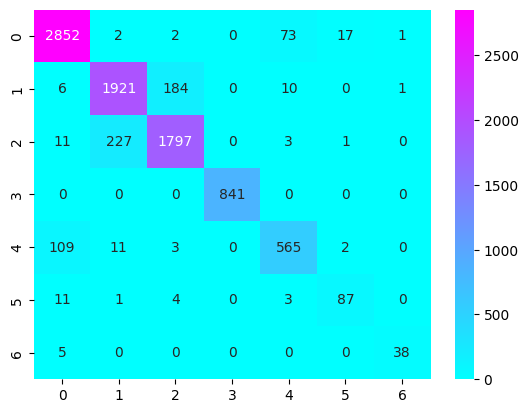

In [125]:
cm = confusion_matrix(Y_test,Y_pred) #membuat confusion matrix
sns.heatmap(cm, annot=True, fmt='d', cmap='cool') #membuat plot confusion matrix
plt.show()

In [ ]:
#df = pd.DataFrame(data)
#print("Before dropping rows:")
#print(df)

Before dropping rows:
       month  day_name  hour  payment_type  city_name    usage_unit  \
0          9         6    21             1         24  0.000000e+00   
1          9         6    21             1         24  0.000000e+00   
2          9         6    21             1         24  0.000000e+00   
3          9         6     7             1         24  0.000000e+00   
4          9         6     4             1         24  1.552794e-03   
...      ...       ...   ...           ...        ...           ...   
43942      4         2    18             1         24  3.641437e-06   
43943      4         2     7             1         24  6.945237e-07   
43944      4         2    20             1         24  5.064781e-02   
43945      4         2    11             1         24  4.549189e-04   
43946      4         2    22             1        101  1.183208e-06   

      servicetype_code  
0                    1  
1                    1  
2                    1  
3                    3  


In [84]:
#data.head()

In [63]:
#data = data.drop(data[data['servicetype_code'].isin(['5', '6'])].index)

#print("\nAfter dropping rows:")
#print(data)



After dropping rows:
       month  day_name  hour  payment_type  city_name    usage_unit  \
0          9         6    21             1         24  0.000000e+00   
1          9         6    21             1         24  0.000000e+00   
2          9         6    21             1         24  0.000000e+00   
3          9         6     7             1         24  0.000000e+00   
4          9         6     4             1         24  1.552794e-03   
...      ...       ...   ...           ...        ...           ...   
43942      4         2    18             1         24  3.641437e-06   
43943      4         2     7             1         24  6.945237e-07   
43944      4         2    20             1         24  5.064781e-02   
43945      4         2    11             1         24  4.549189e-04   
43946      4         2    22             1        101  1.183208e-06   

      servicetype_code  
0                    1  
1                    1  
2                    1  
3                    3  


In [127]:
clf_gini = DecisionTreeClassifier(criterion='gini', max_depth=7, random_state=0) 
clf_gini.fit(X_train, Y_train)
#melatih data

DecisionTreeClassifier(max_depth=7, random_state=0)

In [128]:
y_pred_gini = clf_gini.predict(X_test)
print('Model accuracy score with criterion gini index: ', format(accuracy_score(Y_test, y_pred_gini)*100), "%")

Model accuracy score with criterion gini index:  82.30541647701412 %


In [129]:
y_pred_train_gini = clf_gini.predict(X_train)
y_pred_train_gini
#hasil y prediksi 

array(['2', '2', '3', ..., '3', '0', '2'], dtype=object)

In [130]:
df = pd.DataFrame (y_pred_train_gini)

## save to xlsx file
filepath = 'y_pred_train_gini_copy.xlsx'
df.to_excel(filepath, index=False)

In [131]:
plt.figure(figsize=(80, 50), dpi=300)
tree.plot_tree(clf_gini.fit(X_train, Y_train), fontsize=50)

[Text(0.5321691176470589, 0.9375, 'x[10] <= 89.5\ngini = 0.762\nsamples = 35152\nvalue = [11692, 8260, 8253, 3416, 2937, 444, 150]'),
 Text(0.3625919117647059, 0.8125, 'x[11] <= 3724100.0\ngini = 0.5\nsamples = 12289\nvalue = [0, 6142, 6147, 0, 0, 0, 0]'),
 Text(0.22518382352941177, 0.6875, 'x[6] <= 2062204096.0\ngini = 0.487\nsamples = 10240\nvalue = [0, 4290, 5950, 0, 0, 0, 0]'),
 Text(0.11764705882352941, 0.5625, 'x[6] <= 818439360.0\ngini = 0.435\nsamples = 8532\nvalue = [0, 2728, 5804, 0, 0, 0, 0]'),
 Text(0.058823529411764705, 0.4375, 'x[7] <= 14.5\ngini = 0.28\nsamples = 2421\nvalue = [0, 408, 2013, 0, 0, 0, 0]'),
 Text(0.029411764705882353, 0.3125, 'x[10] <= 42.5\ngini = 0.475\nsamples = 273\nvalue = [0, 106, 167, 0, 0, 0, 0]'),
 Text(0.014705882352941176, 0.1875, 'x[9] <= 5.5\ngini = 0.372\nsamples = 182\nvalue = [0, 45, 137, 0, 0, 0, 0]'),
 Text(0.007352941176470588, 0.0625, 'gini = 0.223\nsamples = 94\nvalue = [0, 12, 82, 0, 0, 0, 0]'),
 Text(0.022058823529411766, 0.0625, 'g

Import Model

In [132]:
import pickle

# Menyimpan model ke dalam file
with open('modelcopy.pkl', 'wb') as f:
    pickle.dump(dt, f)

# Mengambil kembali model dari file
with open('modelcopy.pkl', 'rb') as f:
    dt = pickle.load(f)